In [1]:
%matplotlib inline

# Coloring to preserve Computational Details:
[OpenCV python tutorials](https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_tutorials.html) <br>
[OpenCV miscellaneous transformations](https://docs.opencv.org/2.4/modules/imgproc/doc/miscellaneous_transformations.html) <br>
[OpenCV Index](https://docs.opencv.org/2.4/genindex.html) <br>


In [2]:
import warnings
warnings.filterwarnings('ignore')

import time
import sys
import tempfile

import cv2
import skimage.io as im_io
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import cm
from matplotlib.colors import LinearSegmentedColormap

from PIL import TiffImagePlugin as tip
from PIL.TiffImagePlugin import Image
from PIL import ImageOps

sys.path.insert(0, '../src/')
sys.path.insert(0, 'scalygraphic/src/')

from im_scale_products import *
from impute_color import *

flags = [i for i in dir(cv2) if i.startswith('COLOR_')]
print(flags)

['COLOR_BAYER_BG2BGR', 'COLOR_BAYER_BG2BGRA', 'COLOR_BAYER_BG2BGR_EA', 'COLOR_BAYER_BG2BGR_VNG', 'COLOR_BAYER_BG2GRAY', 'COLOR_BAYER_BG2RGB', 'COLOR_BAYER_BG2RGBA', 'COLOR_BAYER_BG2RGB_EA', 'COLOR_BAYER_BG2RGB_VNG', 'COLOR_BAYER_GB2BGR', 'COLOR_BAYER_GB2BGRA', 'COLOR_BAYER_GB2BGR_EA', 'COLOR_BAYER_GB2BGR_VNG', 'COLOR_BAYER_GB2GRAY', 'COLOR_BAYER_GB2RGB', 'COLOR_BAYER_GB2RGBA', 'COLOR_BAYER_GB2RGB_EA', 'COLOR_BAYER_GB2RGB_VNG', 'COLOR_BAYER_GR2BGR', 'COLOR_BAYER_GR2BGRA', 'COLOR_BAYER_GR2BGR_EA', 'COLOR_BAYER_GR2BGR_VNG', 'COLOR_BAYER_GR2GRAY', 'COLOR_BAYER_GR2RGB', 'COLOR_BAYER_GR2RGBA', 'COLOR_BAYER_GR2RGB_EA', 'COLOR_BAYER_GR2RGB_VNG', 'COLOR_BAYER_RG2BGR', 'COLOR_BAYER_RG2BGRA', 'COLOR_BAYER_RG2BGR_EA', 'COLOR_BAYER_RG2BGR_VNG', 'COLOR_BAYER_RG2GRAY', 'COLOR_BAYER_RG2RGB', 'COLOR_BAYER_RG2RGBA', 'COLOR_BAYER_RG2RGB_EA', 'COLOR_BAYER_RG2RGB_VNG', 'COLOR_BGR2BGR555', 'COLOR_BGR2BGR565', 'COLOR_BGR2BGRA', 'COLOR_BGR2GRAY', 'COLOR_BGR2HLS', 'COLOR_BGR2HLS_FULL', 'COLOR_BGR2HSV', 'COLOR_

# Compute
****
### Algebraic Vector Matrix Data: *EscapeTime, Z_initial, Z_final* (ET, Z0, Z)

In [3]:
results_dir = '../../results'
run_parameters = get_default_run_parameters(results_dir=None)
run_parameters['zoom'] = 1/5
run_parameters['theta'] = -np.pi / 2
if os.path.isdir(run_parameters['dir_path']) == False:
    os.makedirs(run_parameters['dir_path'])
    

fcn_name = 'bugga_bear'
# fcn_name = 'nlC3'
# fcn_name = 'thunderHead'
eq = name_functionhandle_dict[number_function_name_dict[fcn_name]][1]
# generate parameters:
# p = [0.106699281931, -1.446300888486, 0.763588120232]
p = eq(1, None)


print('Using Equation parameters:\n',p,'\n')

list_tuple = [(eq, (p))]

t0 = time.time()
ET_1, Z_1, Z0_1 = eq_iter.get_primitives(list_tuple, run_parameters)
tt = time.time() - t0
print(tt, 's\ndata matrices size = ', ET_1.shape)

Using Equation parameters:
 [-0.85161229, 3.2197212063585856, -88.14578913619096] 

3.708791732788086 s
data matrices size =  (256, 256)


/Users/daniellanier/git_clone/dlanier/scalygraphic/doc_code/../src/deg_0_ddeq.py:27: RuntimeWarning: overflow encountered in cdouble_scalars
  Z = 1 / Z - Z**( n * (Z**p[n-1]) / c)
/Users/daniellanier/git_clone/dlanier/scalygraphic/doc_code/../src/deg_0_ddeq.py:27: RuntimeWarning: overflow encountered in cdouble_scalars
  Z = 1 / Z - Z**( n * (Z**p[n-1]) / c)
/Users/daniellanier/git_clone/dlanier/scalygraphic/doc_code/../src/deg_0_ddeq.py:27: RuntimeWarning: overflow encountered in cdouble_scalars
  Z = 1 / Z - Z**( n * (Z**p[n-1]) / c)
/Users/daniellanier/git_clone/dlanier/scalygraphic/doc_code/../src/deg_0_ddeq.py:27: RuntimeWarning: invalid value encountered in cdouble_scalars
  Z = 1 / Z - Z**( n * (Z**p[n-1]) / c)
/Users/daniellanier/git_clone/dlanier/scalygraphic/doc_code/../src/deg_0_ddeq.py:27: RuntimeWarning: overflow encountered in cdouble_scalars
  Z = 1 / Z - Z**( n * (Z**p[n-1]) / c)
/Users/daniellanier/git_clone/dlanier/scalygraphic/doc_code/../src/deg_0_ddeq.py:27: Runti

In [4]:

# gry_im = cv2.cvtColor(gray,cv2.COLOR_GRAY2RGB)

n_rows, n_cols = ET_1.shape

Zd_n2, Zr_n2, ETn_n2 = etg_norm(Z0_1, Z_1, ET_1)


HSV = np.zeros((n_rows, n_cols, 3)).astype(np.float32)
HSV[:,:,0] += ETn_n2.astype(np.float32)     # Hue
HSV[:,:,1] += Zr_n2.astype(np.float32)      # Saturation
HSV[:,:,2] += Zd_n2.astype(np.float32)      # Value

RGB = np.zeros((n_rows, n_cols, 3)).astype(np.float32)

RGB = cv2.cvtColor(HSV, cv2.COLOR_HSV2RGB)
#HSV cv2.cvtColor(RGB, cv2.COLOR_RGB2HSV)
G = cv2.cvtColor(RGB, cv2.COLOR_RGB2GRAY)
G.shape, type(G[0,0])

((256, 256), numpy.float32)

## Operations with cv2 images

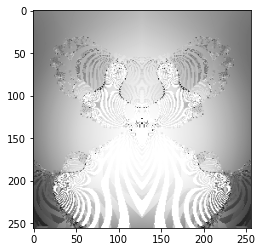

In [5]:
BITS16 = 2**16 - 1
G16 = (G * BITS16).astype(np.uint16)
plt.imshow(G16, 'gist_yarg')

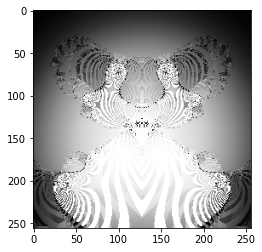

In [6]:
n = 1
Z = im_to_Z(G16, n)

#                   complex_mat_to_im(Z) == 16 bit && skip PIL
Zd = np.abs(Z)
Zr = np.arctan2(np.real(Z), np.imag(Z))

BITS16 = 2**16 - 1
img = (mat2graphic(np.maximum(graphic_norm(Zr), graphic_norm(Zd))) * BITS16).astype(np.uint16)

Zd_16 = ((1-Zd_n2) * BITS16).astype(np.uint16)
# plt.imshow(img, 'gist_gray')
plt.imshow(Zd_16, 'gist_gray')

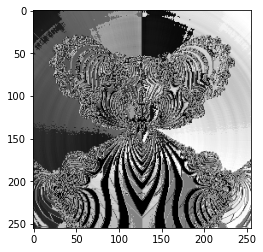

In [7]:
n = 1
Z = im_to_Z(G16, n)
img_8 = complex_mat_to_im(Z)

plt.imshow(img, 'gist_gray')

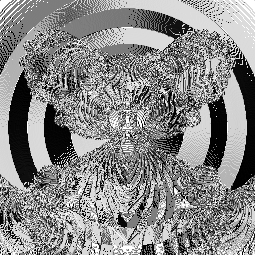

In [8]:
"""
                    8 bit dakine: PIL
"""
im = get_im(ET_1, Z_1, Z0_1)
im_gray = im.convert('L')
im_gray_array = np.array(im_gray)

Z = im_to_Z(im_gray_array, n)
im_inv = ImageOps.invert(complex_mat_to_im(Z))
display(im_inv)

### Speculation: layered image 
#### ET "edges" channel offers enhancement - segmented crispness
```python
"""
    scalygraphic code to PIL
"""
ET_g = primitive_2_gray(ETn_n2)
im_gray = ET_g.convert('L')
im_gray_array = np.array(im_gray)

Z = im_to_Z(im_gray_array, n)
im_inv = ImageOps.invert(complex_mat_to_im(Z))
```
####  ET "hues" channel fills segments
```python
"""
    color-map with matplotlib
"""
c_map_name = 'Set1'
c_map = mpl.cm.get_cmap(c_map_name)
im = c_map(ETn_n2)
```
#### "saturation" conveys dist & rotation
```python
"""
    back to 8 bit for transform with PIL
"""
im = np.uint8(im * 255)
im = tip.Image.fromarray(im)
HSV = im.convert('HSV')
```

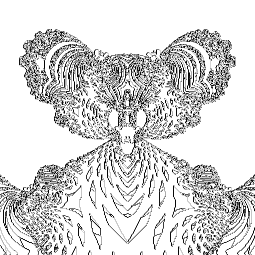

In [9]:
# ET "edges" channel offers enhancement - segmented crispness
ET_g = primitive_2_gray(ETn_n2)
im_gray = ET_g.convert('L')
im_gray_array = np.array(im_gray)

Z = im_to_Z(im_gray_array, n)
im_inv = ImageOps.invert(complex_mat_to_im(Z))
display(im_inv)

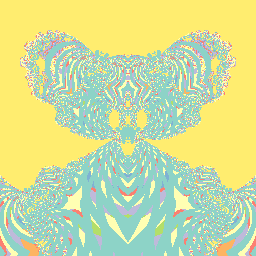

In [10]:
#  ET "hues" channel fills segments

c_map_name = 'Set3'
c_map = mpl.cm.get_cmap(c_map_name)
im = c_map(ETn_n2)
im = np.uint8(im * 255)
im = tip.Image.fromarray(im)

display(im)

<class 'PIL.Image.Image'> (256, 256) RGBA


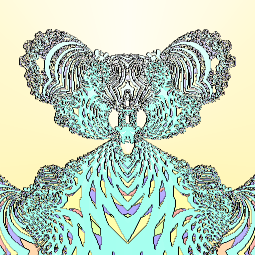

In [11]:
"""
                    Experimentation cell: dynamic controls needed here
"""
# "saturation" conveys dist & rotation
# im_inv = ImageOps.invert(complex_mat_to_im(Z))
im_arr = np.array(im_inv)
brite_edges = np.array(complex_mat_to_im(Z))
print(type(im), im.size, im.mode)
HSV = np.array(im.convert('HSV'))

rgb_im = np.zeros((im.size[0]-1, im.size[1]-1, 3)).astype(np.uint8)
rgb_im[:,:,0] += HSV[:-1,:-1, 0]
rgb_im[:,:,1] += ((0.3 * (1-Zr_n2[:-1,:-1]) + 0.05) * 255).astype(np.uint8)
rgb_im[:,:,2] += im_arr # // 2 + 128
#rgb_im[:,:,2] += brite_edges // 2 + 128
I = tip.Image.fromarray(rgb_im, 'HSV').convert('RGB')

display(I)

## Prototype ^ toward a more natural color mapping
## (Need to deal with *im_2_Z* padding issue)

In [12]:
show_color_maps()

            Accent             Blues              BrBG              BuGn              BuPu
             Dark2              GnBu            Greens             Greys              OrRd
              PRGn            Paired           Pastel1           Pastel2              PiYG
            PuBuGn              PuOr              PuRd           Purples              RdBu
              RdPu            RdYlBu            RdYlGn              Reds              Set1
              Set3          Spectral            Wistia              YlGn            YlGnBu
            YlOrRd            afmhot            autumn            binary              bone
               bwr           cividis              cool          coolwarm            copper
              flag        gist_earth         gist_gray         gist_heat         gist_ncar
        gist_stern         gist_yarg           gnuplot          gnuplot2              gray
               hsv           inferno               jet             magma     nipy_spectral

In [13]:

Zd_n2, Zr_n2, ETn_n2 = etg_norm(Z0_1, Z_1, ET_1)
Zd_n2.shape

(256, 256)

In [14]:
np.array(im_inv).shape

(255, 255)

## Earlier Speculations Below:

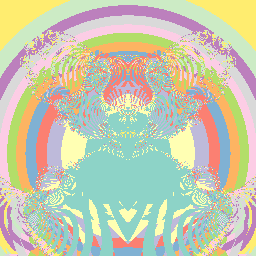

In [15]:
c_map_name = 'Set3'

Zd_16 = (Zd_n2 * BITS16).astype(np.uint16)
c_map = mpl.cm.get_cmap(c_map_name)
im = c_map(Zd_n2)

im = np.uint8(im * 255)
im = tip.Image.fromarray(im)
display(im)

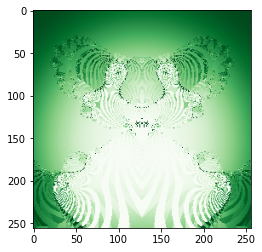

In [16]:
c_map_name = 'Greens'

# Zd_16 = (Zd_n2 * BITS16).astype(np.uint16)
c_map = mpl.cm.get_cmap(c_map_name)
im = c_map(Zd_n2)

plt.imshow(im)

In [17]:
show_color_maps()

            Accent             Blues              BrBG              BuGn              BuPu
             Dark2              GnBu            Greens             Greys              OrRd
              PRGn            Paired           Pastel1           Pastel2              PiYG
            PuBuGn              PuOr              PuRd           Purples              RdBu
              RdPu            RdYlBu            RdYlGn              Reds              Set1
              Set3          Spectral            Wistia              YlGn            YlGnBu
            YlOrRd            afmhot            autumn            binary              bone
               bwr           cividis              cool          coolwarm            copper
              flag        gist_earth         gist_gray         gist_heat         gist_ncar
        gist_stern         gist_yarg           gnuplot          gnuplot2              gray
               hsv           inferno               jet             magma     nipy_spectral

## Test save and open with scikit-image io (it works to preserve 16 bit)

In [18]:
im_io.imsave('G16.tif', G16)

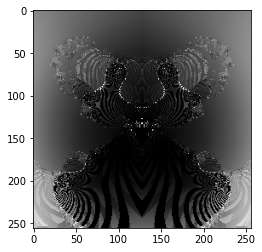

In [19]:
Gray_back = im_io.imread('G16.tif')
plt.imshow(Gray_back, 'gist_gray')

In [20]:
type(Gray_back), type(Gray_back[0,0])

(numpy.ndarray, numpy.uint16)

In [21]:
(G16 - Gray_back).sum()

0

In [22]:
dir(cv2)

['',
 'ACCESS_FAST',
 'ACCESS_MASK',
 'ACCESS_READ',
 'ACCESS_RW',
 'ACCESS_WRITE',
 'ADAPTIVE_THRESH_GAUSSIAN_C',
 'ADAPTIVE_THRESH_MEAN_C',
 'AGAST_FEATURE_DETECTOR_AGAST_5_8',
 'AGAST_FEATURE_DETECTOR_AGAST_7_12D',
 'AGAST_FEATURE_DETECTOR_AGAST_7_12S',
 'AGAST_FEATURE_DETECTOR_NONMAX_SUPPRESSION',
 'AGAST_FEATURE_DETECTOR_OAST_9_16',
 'AGAST_FEATURE_DETECTOR_THRESHOLD',
 'AKAZE',
 'AKAZE_DESCRIPTOR_KAZE',
 'AKAZE_DESCRIPTOR_KAZE_UPRIGHT',
 'AKAZE_DESCRIPTOR_MLDB',
 'AKAZE_DESCRIPTOR_MLDB_UPRIGHT',
 'AKAZE_create',
 'AffineFeature',
 'AffineFeature_create',
 'AffineTransformer',
 'AgastFeatureDetector',
 'AgastFeatureDetector_AGAST_5_8',
 'AgastFeatureDetector_AGAST_7_12d',
 'AgastFeatureDetector_AGAST_7_12s',
 'AgastFeatureDetector_NONMAX_SUPPRESSION',
 'AgastFeatureDetector_OAST_9_16',
 'AgastFeatureDetector_THRESHOLD',
 'AgastFeatureDetector_create',
 'Algorithm',
 'AlignExposures',
 'AlignMTB',
 'AsyncArray',
 'BFMatcher',
 'BFMatcher_create',
 'BORDER_CONSTANT',
 'BORDER_DEFAUL

## Useful examples -- *impute_color.py* functions
****
### View the raw escape time & distance data in greyscle:
* Note that most of the data is not easy to see because the extremes hog the black or white.
* Enumerated, normalized version below shows all three imputed with an HSV scheme.
### Naive method: no normalization

             ET                            Zd                            Zr


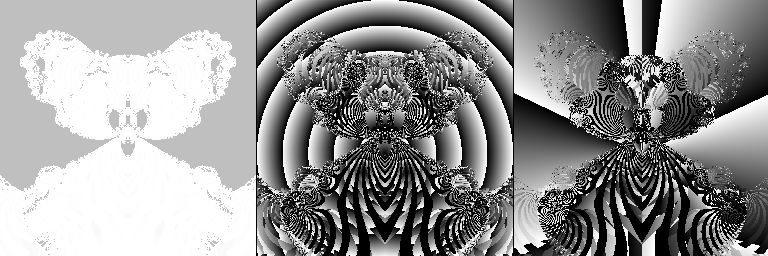

In [23]:
g_im_et = primitive_2_gray(ET_1)
g_im_Zd = primitive_2_gray(np.abs(Z_1 - Z0_1))
Zv = Z_1 - Z0_1
Zv = np.arctan2(np.imag(Zv), np.real(Zv))
g_im_Zr = primitive_2_gray(Zv)


im_list = [g_im_et,g_im_Zd,g_im_Zr]
new_im = cat_im_list_hori(im_list)

print('%15s%30s%30s'%('ET','Zd','Zr'))
display(new_im)

### Naive method: normalize all to graphic floats in range (0, 1)

             ET                            Zd                            Zr


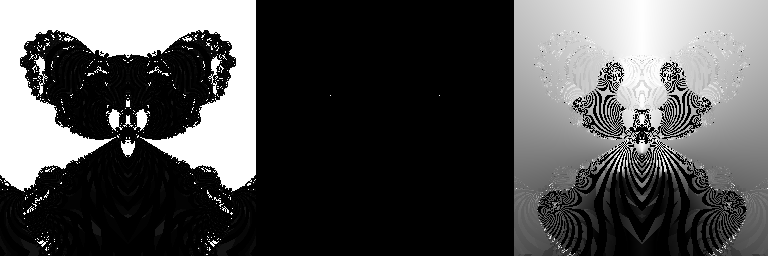

In [24]:
# complex result vectors == final minus initial
Z_vec = Z_1 - Z0_1

#                             normaize all to (0, 1)
# number of iterations
ET_n1 = graphic_norm(ET_1)
g_im_et = primitive_2_gray(ET_n1)
# complex result vectors: distance component
Zd_n1 = np.abs(Z_vec)
Zd_n1 = graphic_norm(Zd_n1)
g_im_Zd = primitive_2_gray(Zd_n1)

# complex result vectors: rotation component
Zr_n1 = np.arctan2(np.imag(Z_vec), np.real(Z_vec))
Zr_n1 = graphic_norm(Zr_n1)
g_im_Zr = primitive_2_gray(Zr_n1)

n_rows = np.shape(ET_1)[0]
n_cols = np.shape(ET_1)[1]

im_list = [g_im_et,g_im_Zd,g_im_Zr]
new_im = cat_im_list_hori(im_list)

print('%15s%30s%30s'%('ET','Zd','Zr'))
display(new_im)

### Problems with the Naive method:
    * Extremes pixel values mask the details in the softer regions


             ET                            Zd                            Zr


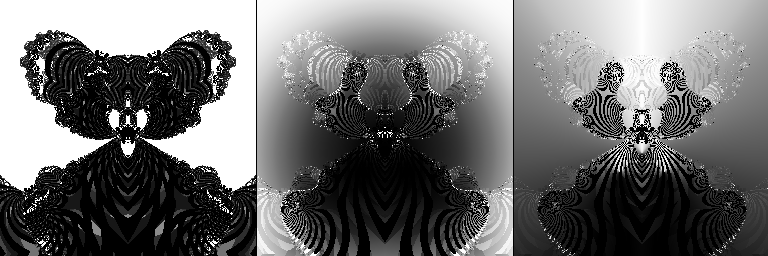

In [25]:
Zd_n2, Zr_n2, ETn_n2 = etg_norm(Z0_1, Z_1, ET_1)

g_im_et = primitive_2_gray(ETn_n2)
# complex result vectors: distance component
g_im_Zd = primitive_2_gray(Zd_n2)

# complex result vectors: rotation component
g_im_Zr = primitive_2_gray(Zr_n2)

im_list = [g_im_et,g_im_Zd,g_im_Zr]
new_im = cat_im_list_hori(im_list)

print('%15s%30s%30s'%('ET','Zd','Zr'))
display(new_im)

### Much better visibility for the distance channel 


### Compositing all three makes a smooter image

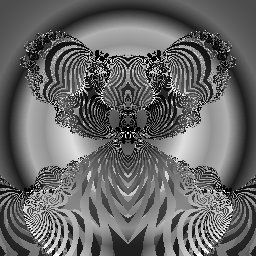

In [26]:
im_gray = get_gray_im(ET_1, Z_1, Z0_1)
display(im_gray)

In [27]:
gray_array = np.array(im_gray)

g = gray_array.reshape(-1)
len(list(set(g)))

255

             ET                            Zd                            Zr


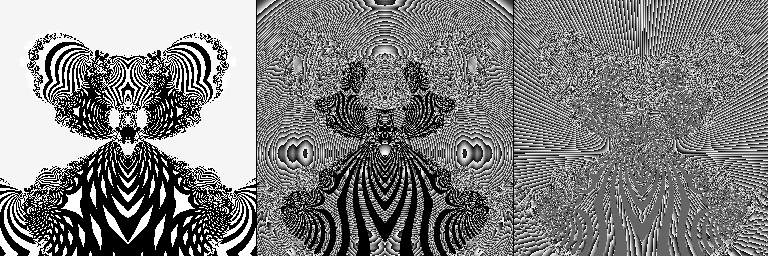

In [28]:
Zv = Z_1 - Z0_1

ET_f, n_colors = flat_index(ET_1)
g_im_et = primitive_2_gray(ET_f)

Zv_f, n_colors = flat_index(np.abs(Zv))
g_im_Zd = primitive_2_gray(Zv_f)


Zr = np.arctan2(np.imag(Zv), np.real(Zv))
Zr_f, n_colors = flat_index(Zr)
g_im_Zr = primitive_2_gray(Zr_f)


im_list = [g_im_et,g_im_Zd,g_im_Zr]
new_im = cat_im_list_hori(im_list)

print('%15s%30s%30s'%('ET','Zd','Zr'))
display(new_im)

## Compare normalization options for grayscale from HSV>RGB
Note that the raw normaization has less detail in the gradients

In [29]:
im = map_raw_etg(Z0_1, Z_1, ET_1, c_map_name='gist_gray')
display(im)

NameError: name 'map_raw_etg' is not defined

A.shape, A[0,0], type(A[0,0])
 (256, 256) 75 <class 'numpy.uint8'>


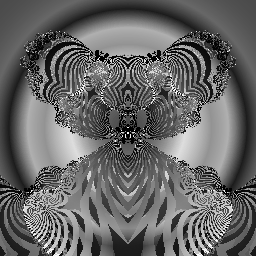

In [30]:
im = get_gray_im(ET_1, Z_1, Z0_1)
A = np.array(im)
print('A.shape, A[0,0], type(A[0,0])\n',A.shape, A[0,0], type(A[0,0]))
display(im)

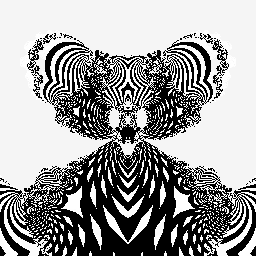

In [31]:
g_im_et = primitive_2_gray(ET_1)
display(g_im_et)

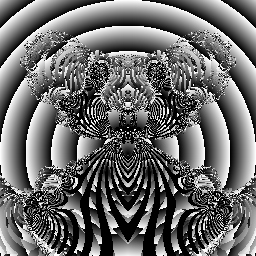

In [32]:
g_im_Zd = primitive_2_gray(np.abs(Z_1 - Z0_1))
display(g_im_Zd)

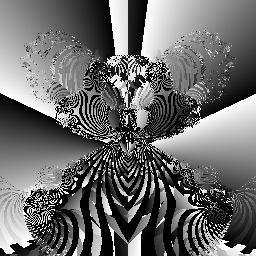

In [33]:
# Zd_1, Zr_1, ETn_1 = etg_norm(Z0_1, Z_1, ET_1)
Zv = Z_1 - Z0_1
Zv = np.arctan2(np.imag(Zv), np.real(Zv))
g_im_Zr = primitive_2_gray(Zv)
# g_im = tip.Image.fromarray(Zv, 'L', colors=2**16-1)

display(g_im_Zr)

### View all results as an HSV (converted to RGB for display)
```python
# normalized enumeration of Z-Z0 distance, rotation (Zd, Zr) and Escape Time
Zd, Zr, ETn = etg_norm(Z0, Z, ET)

A = np.zeros((n_rows, n_cols,3))
A[:,:,0] += ETn     # Hue
A[:,:,1] += Zr      # Saturation
A[:,:,2] += Zd      # Value
```

## View The Rotated Data with different color assignments

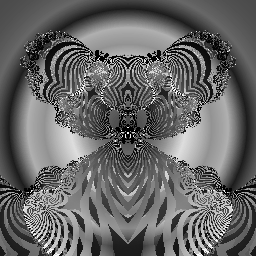

In [34]:
def map_etg_composite_NB(Z0, Z, ET, c_map_name='gray'):
    """ get an RGB image of HSV composite index to color map

    Args:
        ET:     (Integer) matrix of the Escape Times
        Z:      (complex) matrix of the final vectors
        Z0:     (complex) matrix of the starting plane

    Returns:
        I:      RGB PIL image
    """
    im = np.array(get_im(ET, Z, Z0).convert('L'))

    c_map = mpl.cm.get_cmap(c_map_name)
    im = c_map(im)
    
    im = np.uint8(im * 255)
    # im = np.uint16(im * 65535)
    im = tip.Image.fromarray(im)
    
    return im

im_test = map_etg_composite_NB(Z0_1, Z_1, ET_1, c_map_name='gray')
display(im_test)

In [37]:
2**16 - 1


65535

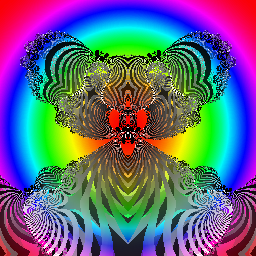

In [35]:
#                     HSV to RGB composite
im = get_im(ET_1, Z_1, Z0_1)
display(im)

## Color map assignment to where greyscale is used as index to map
(choose color map from the list)

In [39]:
show_color_maps(6)

            Accent             Blues              BrBG              BuGn              BuPu            CMRmap
              GnBu            Greens             Greys              OrRd           Oranges              PRGn
           Pastel1           Pastel2              PiYG              PuBu            PuBuGn              PuOr
           Purples              RdBu              RdGy              RdPu            RdYlBu            RdYlGn
              Set1              Set2              Set3          Spectral            Wistia              YlGn
            YlOrBr            YlOrRd            afmhot            autumn            binary              bone
               bwr           cividis              cool          coolwarm            copper         cubehelix
        gist_earth         gist_gray         gist_heat         gist_ncar      gist_rainbow        gist_stern
           gnuplot          gnuplot2              gray               hot               hsv           inferno
             magma 

In [36]:
#                     HSV to RGB composite to Greyscale as index to colormap
do_im = map_etg_composite(Z0_1, Z_1, ET_1, c_map_name='afmhot')
display(do_im)

NameError: name 'map_etg_composite' is not defined

A.shape, A[0,0], type(A[0,0])
 (256, 256, 4) [131 131 131 255] <class 'numpy.ndarray'>


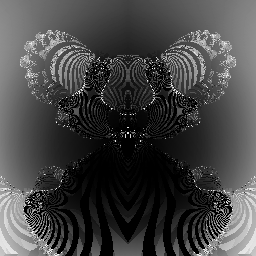

In [41]:
do_im = map_etg_composite(Z0_1, Z_1, ET_1, c_map_name='gray')
A = np.array(do_im)
print('A.shape, A[0,0], type(A[0,0])\n',A.shape, A[0,0], type(A[0,0]))

display(do_im)

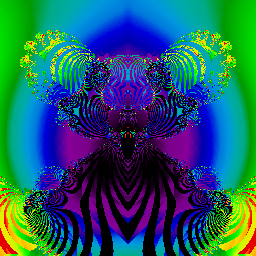

In [42]:
do_im = map_etg_composite(Z0_1, Z_1, ET_1, c_map_name='nipy_spectral')
display(do_im)

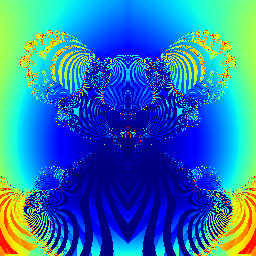

In [43]:
do_im = map_etg_composite(Z0_1, Z_1, ET_1, c_map_name='jet')
display(do_im)